# Week 6
# Getting Started with Pandas
# Analyzing MovieLens Data
We will continue our exploration of [MovieLens](https://grouplens.org/datasets/movielens/) `ml-latest-small` dataset.

In [1]:
import pandas as pd

In [2]:
# Load the processed rating data file from the previous class.
ratings_df = pd.read_csv('Data/ml-latest-small/ratings_processed.csv', sep = ',', index_col=0)
ratings_df.head(10)

,userId,movieId,rating,Year,DT
0,1,1,4.0,2000,2000-07-30 14:45:03
1,1,3,4.0,2000,2000-07-30 14:20:47
2,1,6,4.0,2000,2000-07-30 14:37:04
3,1,47,5.0,2000,2000-07-30 15:03:35
4,1,50,5.0,2000,2000-07-30 14:48:51
5,1,70,3.0,2000,2000-07-30 14:40:00
6,1,101,5.0,2000,2000-07-30 14:14:28
7,1,110,4.0,2000,2000-07-30 14:36:16
8,1,151,5.0,2000,2000-07-30 15:07:21
9,1,157,5.0,2000,2000-07-30 15:08:20


In [ ]:
# Let's drop the timestamp column and update the csv file.
# ratings_df = ratings_df.drop("timestamp", axis=1)
if "timestamp" in ratings_df.columns:
    ratings_df.drop("timestamp", axis=1, inplace=True)
# ratings_df.head()

ratings_df.to_csv("Data/ml-latest-small/ratings_processed.csv")

## 1. Gather Basic Information
- Shape
- Column names
- Data types
- Distribution of each column
- Missing values?

In [3]:
# Display shape

ratings_df.shape

(100836, 5)

In [4]:
# Display column names

ratings_df.columns.values

array(['userId', 'movieId', 'rating', 'Year', 'DT'], dtype=object)

In [5]:
# Display data types

ratings_df.dtypes

userId       int64
movieId      int64
rating     float64
Year         int64
DT          object
dtype: object

In [6]:
# We notice that the data type of the DT column is "object".
# Let's convert it to "datetime"
ratings_df['DT'] = pd.to_datetime(ratings_df['DT'])
# import numpy as np
# ratings_df['DT'].astype(np.datetime64)

ratings_df.dtypes

userId              int64
movieId             int64
rating            float64
Year                int64
DT         datetime64[ns]
dtype: object

In [7]:
# Check for missing values
ratings_df.isnull().sum()

userId     0
movieId    0
rating     0
Year       0
DT         0
dtype: int64

In [8]:
# Show value counts of ratings

ratings_df['rating'].value_counts().sort_index(ascending=False)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64

<AxesSubplot:>

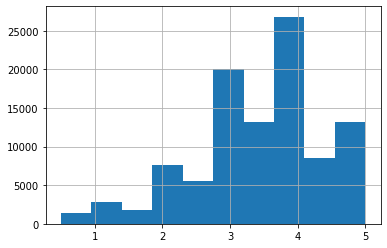

In [9]:
# Draw a histogram of ratings

ratings_df['rating'].hist()

<AxesSubplot:>

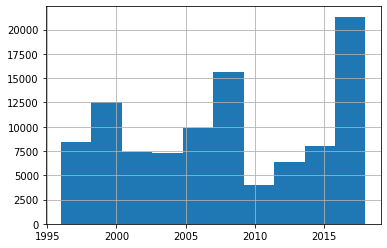

In [10]:
# Draw a histogram of years

ratings_df['Year'].hist()

## 2. Identify Highly-Rated Movies
- For each movie, extract all of its ratings.
- Calculate the average rating of each movie.
- Sort the average ratings in descending order.
- What are the top 5 highly-rated movies? Notice anything strange?

In [11]:
# Load movies.csv for movie titles
movies_df = pd.read_csv('Data/ml-latest-small/movies.csv', sep=',')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# The ID of movie Toy Story is 1.
# Let's create a filter to extract all of its user ratings.
filter1 = (ratings_df['movieId'] == 1)
ratings_1 = ratings_df[filter1]

# ratings_1 = ratings_df[ratings_df['movieId'] == 1]

ratings_1.head()

,userId,movieId,rating,Year,DT
0,1,1,4.0,2000,2000-07-30 14:45:03
516,5,1,4.0,1996,1996-11-08 01:36:02
874,7,1,4.5,2005,2005-01-25 01:52:26
1434,15,1,2.5,2017,2017-11-13 07:59:30
1667,17,1,4.5,2011,2011-05-18 01:28:03


In [13]:
# Calculate the average rating of Toy Story.

ratings_1['rating'].mean()

3.9209302325581397

In [14]:
# Assign the average rating to movies_df under a new column named "AvgRating"

movies_df.loc[(movies_df['movieId'] == 1), "AvgRating"] = \
                                                ratings_1['rating'].mean()
movies_df.head()

,movieId,title,genres,AvgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [15]:
# How can we find the average rating for each movie?
# 1. Write a function "get_avg_rating()" that takes in ratings_df and a movie ID,
#    and returns its average rating.
# 2. Create a for loop to loop through all rows in movies_df.
# 3. In the loop, call "get_avg_rating()" and place the returned value in
#    "AvgRating" column.

def get_avg_rating(ratings_df, movie_id):
    
    # 1. extract all rows about this movie
    ratings_movie = ratings_df[ratings_df['movieId'] == movie_id]
    
    # 2. return their average rating
    return ratings_movie['rating'].mean()

In [16]:
# Test the function on movie Toy Story
get_avg_rating(ratings_df, 1)

3.9209302325581397

In [17]:
for idx in movies_df.index:
    
    movie_id = movies_df.loc[idx, "movieId"]
    movies_df.loc[idx, "AvgRating"] = get_avg_rating(ratings_df, movie_id)

In [18]:
movies_df.head()

,movieId,title,genres,AvgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [19]:
movies_df.isnull().sum()
# 18 movies do not have an average rating. It is probably because there are no
# ratings for these movies.

movieId       0
title         0
genres        0
AvgRating    18
dtype: int64

In [20]:
movies_df.shape

(9742, 4)

In [21]:
# Sort movies_df by AvgRating.

movies_df.sort_values("AvgRating", ascending=False).head(10)

,movieId,title,genres,AvgRating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [23]:
# It turns out that we also need to know the number of ratings given to a movie.
# Find the number of user ratings for each movie, and place the result in
# a new column named "NumRatings"

def get_num_ratings(ratings_df, movie_id):
    
    ratings_movie = ratings_df[ratings_df['movieId'] == movie_id]
    return ratings_movie.shape[0]

In [24]:
get_num_ratings(ratings_df, 1)

215

In [25]:
for idx in movies_df.index:
    
    movie_id = movies_df.loc[idx, "movieId"]
    movies_df.loc[idx, "NumRatings"] = get_num_ratings(ratings_df, movie_id)

In [26]:
movies_df.head()

,movieId,title,genres,AvgRating,NumRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


<AxesSubplot:>

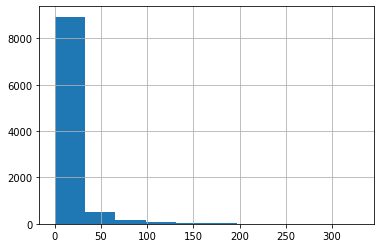

In [27]:
# How are NumRatings distributed?

movies_df['NumRatings'].hist()

In [ ]:
movies_df.sort_values("AvgRating", ascending=False).head(10)

In [28]:
# Remove movies with very few ratings.
# Set the threshold as 50
popular_movies = movies_df[movies_df['NumRatings'] >= 50]
popular_movies.head()

,movieId,title,genres,AvgRating,NumRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0


In [29]:
# Find the top-10 highest rated movies.

popular_movies.sort_values("AvgRating", ascending=False).head(10)

,movieId,title,genres,AvgRating,NumRatings
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192.0
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218.0
975,1276,Cool Hand Luke (1967),Drama,4.271930,57.0
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.268041,97.0
686,904,Rear Window (1954),Mystery|Thriller,4.261905,84.0
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129.0
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.252336,107.0
914,1213,Goodfellas (1990),Crime|Drama,4.250000,126.0
694,912,Casablanca (1942),Drama|Romance,4.240000,100.0


## 3. Analyze Genres
- Split the string in "genres" column into separate genres.
- Create a set of all genres.
- Create a column for each genre. Use 0 and 1 to indicate whether each movie belongs to that genre.
- How many movies are there for each genre?
- What is the average rating for each genre?

In [31]:
# Split the string in "genre" column into separate genres.
genres_1 = movies_df.loc[0, 'genres']
print(genres_1)
print(genres_1.split('|'))

Adventure|Animation|Children|Comedy|Fantasy
['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']


In [32]:
# Create a set of all genres.
all_genres = set({})
for idx in movies_df.index:
    genres = movies_df.loc[idx, 'genres'].split('|')
    all_genres = all_genres.union(set(genres))
print(all_genres)

{'Comedy', 'Film-Noir', 'War', 'Romance', 'Action', 'Drama', 'Sci-Fi', '(no genres listed)', 'IMAX', 'Mystery', 'Adventure', 'Crime', 'Western', 'Thriller', 'Horror', 'Children', 'Musical', 'Documentary', 'Fantasy', 'Animation'}


In [42]:
# Attempt 1: Find the word "Comedy" from a string
genre = "Comedy"
test_str = "I like watching Comedy movies."
test_str.find(genre)

# Attempt 2: Find the word from a string in column "genres"
movies_df.loc[2, "genres"].find(genre)

# Attepmt 3: Find the word from each string in column "genres"
for idx in movies_df.index:
    
    if movies_df.loc[idx, "genres"].find(genre) == -1:
        movies_df.loc[idx, "Comedy"] = 0
    else:
        movies_df.loc[idx, "Comedy"] = 1
        
movies_df.head()

,movieId,title,genres,AvgRating,NumRatings,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,1.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,1.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,1.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0,0.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0,1.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8.0,0.0
8,9,Sudden Death (1995),Action,3.125000,16.0,0.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0,0.0


In [43]:
for genre in all_genres:
    
    for idx in movies_df.index:
    
        if movies_df.loc[idx, "genres"].find(genre) == -1:
            movies_df.loc[idx, genre] = 0
        else:
            movies_df.loc[idx, genre] = 1

In [44]:
movies_df.head()

,movieId,title,genres,AvgRating,NumRatings,Comedy,Film-Noir,War,Romance,Action,...,Adventure,Crime,Western,Thriller,Horror,Children,Musical,Documentary,Fantasy,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Create a column for each genre. 
# Use 0 and 1 to indicate whether each movie belongs to that genre.
for genre in all_genres:
    if '(' in genre: # exclude '(no genres listed)'
        continue
    movies_df[genre] = movies_df['genres'].str.contains(genre).astype(int)
movies_df.head()

,movieId,title,genres,AvgRating,NumRatings,Comedy,Film-Noir,War,Romance,Action,...,Adventure,Crime,Western,Thriller,Horror,Children,Musical,Documentary,Fantasy,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# How many movies are there for each genre?

for genre in all_genres:
    if '(' in genre: # exclude '(no genres listed)'
        continue
    print("Genre: ", genre, "- number of movies:",
          movies_df[genre].value_counts().loc[1]) # 3756 comedy movies

Genre:  Comedy - number of movies: 3756
Genre:  Film-Noir - number of movies: 87
Genre:  War - number of movies: 382
Genre:  Romance - number of movies: 1596
Genre:  Action - number of movies: 1828
Genre:  Drama - number of movies: 4361
Genre:  Sci-Fi - number of movies: 980
Genre:  IMAX - number of movies: 158
Genre:  Mystery - number of movies: 573
Genre:  Adventure - number of movies: 1263
Genre:  Crime - number of movies: 1199
Genre:  Western - number of movies: 167
Genre:  Thriller - number of movies: 1894
Genre:  Horror - number of movies: 978
Genre:  Children - number of movies: 664
Genre:  Musical - number of movies: 334
Genre:  Documentary - number of movies: 440
Genre:  Fantasy - number of movies: 779
Genre:  Animation - number of movies: 611


In [56]:
movies_df[all_genres].sum().astype(int).sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int32

In [57]:
# What is the average rating for each genre?

avg_ratings = {}

for genre in all_genres:
    
    if '(' in genre: # exclude '(no genres listed)'
        continue
    
    avg_rating = movies_df[movies_df[genre] == 1]['AvgRating'].mean()
    avg_ratings[genre] = avg_rating
    print(f"Average rating of {genre} movies:", avg_rating)

Average rating of Comedy movies: 3.181716291867792
Average rating of Film-Noir movies: 3.6704709375189575
Average rating of War movies: 3.5716549384975464
Average rating of Romance movies: 3.3648703259133232
Average rating of Action movies: 3.0944984491955134
Average rating of Drama movies: 3.4209053471055375
Average rating of Sci-Fi movies: 3.1026374537884083
Average rating of IMAX movies: 3.3119963710928855
Average rating of Mystery movies: 3.3303636065388313
Average rating of Adventure movies: 3.215229808197848
Average rating of Crime movies: 3.301843831031174
Average rating of Western movies: 3.3833889087601268
Average rating of Thriller movies: 3.1561160994630257
Average rating of Horror movies: 2.9189646997100778
Average rating of Children movies: 3.1076903605293134
Average rating of Musical movies: 3.2963709618468595
Average rating of Documentary movies: 3.7816816901269963
Average rating of Fantasy movies: 3.218843125330386
Average rating of Animation movies: 3.497119150128774


In [64]:
# Create a data frame that contains the average rating of each genre

summary_df = pd.DataFrame(columns=["Genre", "AverageRating"])

# Generalize the following statement to all genres.
idx = 0
for genre in all_genres:
    movies_in_this_genre = movies_df[movies_df[genre] == 1]
    average_rating_of_this_genre = movies_in_this_genre['AvgRating'].mean()
    summary_df.loc[idx, :] = [genre, average_rating_of_this_genre]
    idx += 1

summary_df.sort_values("AverageRating", ascending=False)

,Genre,AverageRating
17,Documentary,3.78168
1,Film-Noir,3.67047
2,War,3.57165
19,Animation,3.49712
5,Drama,3.42091
12,Western,3.38339
7,(no genres listed),3.37115
3,Romance,3.36487
9,Mystery,3.33036
8,IMAX,3.312


In [66]:
# Create a data frame that contains the average rating and the number of
# movies of each genre

summary_df = pd.DataFrame(columns=["Genre", "AverageRating", "NumberOfMovies"])

# Generalize the following statement to all genres.
idx = 0
for genre in all_genres:
    movies_in_this_genre = movies_df[movies_df[genre] == 1]
    average_rating_of_this_genre = movies_in_this_genre['AvgRating'].mean()
#     number_of_movies = movies_in_this_genre.shape[0]
    number_of_movies = movies_df[genre].sum()
    summary_df.loc[idx, :] = [genre, average_rating_of_this_genre,
                              number_of_movies]
    idx += 1

summary_df.sort_values("AverageRating", ascending=False)

,Genre,AverageRating,NumberOfMovies
17,Documentary,3.78168,440
1,Film-Noir,3.67047,87
2,War,3.57165,382
19,Animation,3.49712,611
5,Drama,3.42091,4361
12,Western,3.38339,167
7,(no genres listed),3.37115,34
3,Romance,3.36487,1596
9,Mystery,3.33036,573
8,IMAX,3.312,158
